In [1]:
import pandas as pd

In [2]:
budgets = pd.read_csv('/Users/Arsh/Downloads/tn.movie_budgets.csv.gz')
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In this notebook, I am going through the data in the movie budgets dataframe. First, I will clean the data by making the monetary values in columns production_budget and domestic_gross into integers. Also, as a sidenote, I am removing worldwide_gross column as we have decided to primarily use informaton on the domestic film market as there is far more information on domestic movies, audiences, etc. in general. As the release_date is in string form, this will be converted into a datetime object. 

In [3]:
budgets['production_budget'] = budgets['production_budget'].str.replace(',', '')
budgets['production_budget'] = budgets['production_budget'].str.replace('$', '')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(',', '')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('$', '')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace(',', '')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('$', '')
budgets['release_date'] = budgets['release_date'].str.replace(',', '')
budgets['production_budget']= budgets['production_budget'].astype('int64')
budgets['domestic_gross'] = budgets['domestic_gross'].astype('int64')
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype('int64')
budgets['release_date'] = budgets['release_date'].str.replace('Jan', 'January')
budgets['release_date'] = budgets['release_date'].str.replace('Feb', 'February')
budgets['release_date'] = budgets['release_date'].str.replace('Mar', 'March')
budgets['release_date'] = budgets['release_date'].str.replace('Apr', 'April')
budgets['release_date'] = budgets['release_date'].str.replace('Jun', 'June')
budgets['release_date'] = budgets['release_date'].str.replace('Jul', 'July')
budgets['release_date'] = budgets['release_date'].str.replace('Aug', 'August')
budgets['release_date'] = budgets['release_date'].str.replace('Sep', 'September')
budgets['release_date'] = budgets['release_date'].str.replace('Oct', 'October')
budgets['release_date'] = budgets['release_date'].str.replace('Nov', 'November')
budgets['release_date'] = budgets['release_date'].str.replace('Dec', 'December')
budgets['release_date'] = pd.to_datetime(budgets['release_date'])

As we only want current movie information, we as a group, have decided to only use information from movies that are released from the year 2001 onwards.

In [4]:
budgets = budgets.loc[budgets['release_date'] >= '2001-01-01']

In [5]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


I will create two columns that will state whether or not a movie is profitable by simply subtracting the production_budget from the doemstic_gross. Profitable movies are those that have a profit over the value of 0 while unprofitable movies are those whose domestic_gross values do not exceed their budgets.

In [6]:
budgets['profit'] = budgets['domestic_gross'] - budgets['production_budget']
budgets['profitable'] = budgets['profit'] > 0
budgets['unprofitable'] = budgets['profit'] <= 0
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profitable,unprofitable
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,335507625,True,False
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,False,True
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,False,True
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,True,False
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,True,False


Here I created a column that shows profit margin by using the formula 100*((revenue - costs)/revenue), then i grouped the df by that column, placing the most profitable movies at the top. 

In [7]:
budgets['domestic_profit_margin'] = 100* ((budgets['domestic_gross'] - budgets['production_budget']) / budgets['domestic_gross'])
budgets['worldwide_profit_margin'] = 100* ((budgets['worldwide_gross'] - budgets['production_budget']) / budgets['worldwide_gross'])
budgets = budgets.sort_values(by='worldwide_profit_margin', ascending=False)

In [8]:
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profitable,unprofitable,domestic_profit_margin,worldwide_profit_margin
5492,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,107468810,True,False,99.583020,99.768260
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,True,False,99.560718,99.759941
5709,10,2004-05-07,Super Size Me,65000,11529368,22233808,11464368,True,False,99.436222,99.707652
5781,82,2005-08-05,My Date With Drew,1100,181041,181041,179941,True,False,99.392403,99.392403
5656,57,2007-05-16,Once,150000,9445857,23323631,9295857,True,False,98.412002,99.356875
...,...,...,...,...,...,...,...,...,...,...,...
4563,64,2015-12-31,The Veil,4000000,0,0,-4000000,False,True,-inf,-inf
4562,63,2012-12-31,The Helpers,4000000,0,0,-4000000,False,True,-inf,-inf
3453,54,2014-10-03,Drive Hard,12000000,0,0,-12000000,False,True,-inf,-inf
4561,62,2012-11-09,Replicas,4000000,0,0,-4000000,False,True,-inf,-inf


While the information gained, particularly on profitability are interesting, there are limitation to the ultization of this information as there is no categorical information on this movie. As a result, I will make a join with a df that has categorical informaiton on these movies. This other dataframe was created by my partner and has much categorical information on popular films from the years 2012 onwards. As his data is only from 2012 onwardsw for the sake of simplicity and making sure our data is similar, i will modofy the budgets df to only have movies from 2012 onwards.

In [9]:
budgets2 = budgets.loc[budgets['release_date'] >= '2012-01-01']
budgets2.shape

(1666, 11)

In [10]:
budgets2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profitable,unprofitable,domestic_profit_margin,worldwide_profit_margin
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,True,False,99.560718,99.759941
5211,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,52262945,True,False,98.122522,99.017291
5213,14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,True,False,96.950257,98.446341
4249,50,2017-01-20,Split,5000000,138141585,278964806,133141585,True,False,96.380525,98.207659
5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,59605732,True,False,98.107174,98.196845
...,...,...,...,...,...,...,...,...,...,...,...
4563,64,2015-12-31,The Veil,4000000,0,0,-4000000,False,True,-inf,-inf
4562,63,2012-12-31,The Helpers,4000000,0,0,-4000000,False,True,-inf,-inf
3453,54,2014-10-03,Drive Hard,12000000,0,0,-12000000,False,True,-inf,-inf
4561,62,2012-11-09,Replicas,4000000,0,0,-4000000,False,True,-inf,-inf


In [11]:
genres = pd.read_csv('/Users/Arsh/Flatiron/Gitlab/movies_clean.csv')
df=pd.merge(budgets2,genres, left_on="movie", right_on="primary_title", how='left')
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profitable,unprofitable,domestic_profit_margin,...,Close,Distributor,release_year,movie_id,runtime_minutes,genre1,genre2,genre3,release_month,month
0,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,True,False,99.560718,...,Sep 17,Warner Bros.,2015.0,tt2309260,81.0,Horror,Mystery,Thriller,Jul,Jul
1,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,52262945,True,False,98.122522,...,Mar 22,Paramount Pictures,2012.0,tt1560985,83.0,Horror,NaN,NaN,Jan,Jan
2,14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,True,False,96.950257,...,May 28,Universal Pictures,2015.0,tt3713166,83.0,Horror,Mystery,Thriller,Apr,Apr
3,50,2017-01-20,Split,5000000,138141585,278964806,133141585,True,False,96.380525,...,May 11,Universal Pictures,2017.0,tt6147768,123.0,Action,Drama,Sport,Jan,Jan
4,50,2017-01-20,Split,5000000,138141585,278964806,133141585,True,False,96.380525,...,May 11,Universal Pictures,2017.0,tt3315656,127.0,Drama,Fantasy,NaN,Jan,Jan


This merge was largely unsuccessfull. Only 5 rows had title in common. As this happened, I will remerge these two dfs after cleaning the data in these columns so there are no issues of mismatching punctuation, etc. 

In [12]:
genres.shape

(2441, 18)

In [13]:
budgets2.to_csv('newbudgetdf.csv', index=False)

In [14]:
budgets2.shape

(1666, 11)

In [15]:
budgets2["movie"] = budgets['movie'].str.replace('[^\w\s]','')

<ipython-input-15-758501bcdac3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets2["movie"] = budgets['movie'].str.replace('[^\w\s]','')


In [16]:
genres["primary_title"] = genres['primary_title'].str.replace('[^\w\s]','')

In [17]:
genres

,Unnamed: 0,Rank,primary_title,Gross,Max Th,Opening,Open Th,Open,Close,Distributor,release_year,movie_id,runtime_minutes,genre1,genre2,genre3,release_month,month
0,2117,19,Underwater,17291078,2791.0,7008297.0,7008297.0,YYYY-00-DD 00:00:SS,NaN,Twentieth Century Fox,2020,tt5774060,NaN,Action,Drama,Thriller,Jan,Jan
1,1405,76,Monster Trucks,33370166,NaN,10950705.0,10950705.0,YYYY-00-DD 00:00:SS,Mar 16,Paramount Pictures,2017,tt3095734,104.0,Action,Adventure,Comedy,Jan,Jan
2,1178,96,The Forest,26594261,NaN,12741176.0,12741176.0,YYYY-00-DD 00:00:SS,Mar 17,Focus Features,2016,tt4982356,109.0,Drama,Fantasy,Horror,Jan,Jan
3,2340,184,Supernova,234220,330.0,90096.0,90096.0,YYYY-00-DD 00:00:SS,NaN,Bleecker Street Media,2021,tt4231466,135.0,Drama,Mystery,Sci-Fi,Jan,Jan
4,111,102,One for the Money,26414527,2737.0,11515790.0,11515790.0,YYYY-00-DD 00:00:SS,Apr 12,Lionsgate,2012,tt1598828,91.0,Action,Comedy,Crime,Jan,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,1813,164,Amazing Grace,4450456,NaN,57353.0,57353.0,YYYY-00-DD 00:00:SS,Jul 21,Neon,2018,tt4935462,89.0,Documentary,Music,NaN,Dec,Dec
2437,819,34,Sisters,87044645,NaN,13922855.0,13922855.0,YYYY-00-DD 00:00:SS,Mar 10,Universal Pictures,2015,tt9048972,72.0,Biography,Comedy,Documentary,Dec,Dec
2438,843,52,Joy,56451232,NaN,17015168.0,17015168.0,YYYY-00-DD 00:00:SS,Mar 17,Twentieth Century Fox,2015,tt10243672,NaN,NaN,NaN,NaN,Dec,Dec
2439,1216,125,Jackie,13960394,NaN,278715.0,278715.0,YYYY-00-DD 00:00:SS,Apr 20,Fox Searchlight Pictures,2016,tt1757772,126.0,Action,NaN,NaN,Dec,Dec


In [18]:
budgets2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profitable,unprofitable,domestic_profit_margin,worldwide_profit_margin
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,True,False,99.560718,99.759941
5211,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,52262945,True,False,98.122522,99.017291
5213,14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,True,False,96.950257,98.446341
4249,50,2017-01-20,Split,5000000,138141585,278964806,133141585,True,False,96.380525,98.207659
5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,59605732,True,False,98.107174,98.196845
...,...,...,...,...,...,...,...,...,...,...,...
4563,64,2015-12-31,The Veil,4000000,0,0,-4000000,False,True,-inf,-inf
4562,63,2012-12-31,The Helpers,4000000,0,0,-4000000,False,True,-inf,-inf
3453,54,2014-10-03,Drive Hard,12000000,0,0,-12000000,False,True,-inf,-inf
4561,62,2012-11-09,Replicas,4000000,0,0,-4000000,False,True,-inf,-inf


In [19]:
df=pd.merge(budgets2,genres, left_on="movie", right_on="primary_title", how='left')
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profitable,unprofitable,domestic_profit_margin,...,Close,Distributor,release_year,movie_id,runtime_minutes,genre1,genre2,genre3,release_month,month
0,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,True,False,99.560718,...,Sep 17,Warner Bros.,2015.0,tt2309260,81.0,Horror,Mystery,Thriller,Jul,Jul
1,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,52262945,True,False,98.122522,...,Mar 22,Paramount Pictures,2012.0,tt1560985,83.0,Horror,NaN,NaN,Jan,Jan
2,14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,True,False,96.950257,...,May 28,Universal Pictures,2015.0,tt3713166,83.0,Horror,Mystery,Thriller,Apr,Apr
3,50,2017-01-20,Split,5000000,138141585,278964806,133141585,True,False,96.380525,...,May 11,Universal Pictures,2017.0,tt6147768,123.0,Action,Drama,Sport,Jan,Jan
4,50,2017-01-20,Split,5000000,138141585,278964806,133141585,True,False,96.380525,...,May 11,Universal Pictures,2017.0,tt3315656,127.0,Drama,Fantasy,NaN,Jan,Jan


In [20]:
df.shape

(2094, 29)

In [21]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['Close'], axis=1)
df = df.drop(['release_year'], axis=1)
df = df.drop(['movie_id'], axis=1)
df = df.drop(['runtime_minutes'], axis=1)
df = df.drop(['month'], axis = 1)
df = df.drop(['Gross'], axis = 1)
df = df.drop(['Max Th'], axis = 1)
df = df.drop(['Rank'], axis = 1)
df = df.drop(['Opening'], axis = 1)
df = df.drop(['Open Th'], axis = 1)
df = df.drop(['Open'], axis = 1)

In [22]:
df.isna().sum()

id                            0
release_date                  0
movie                         0
production_budget             0
domestic_gross                0
worldwide_gross               0
profit                        0
profitable                    0
unprofitable                  0
domestic_profit_margin        0
worldwide_profit_margin       0
primary_title               687
Distributor                 693
genre1                      703
genre2                     1017
genre3                     1314
release_month               687
dtype: int64

In [23]:
df1=df.dropna(thresh=10)
df1 = df1.dropna(subset=['genre1'])

In [24]:
df1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profitable,unprofitable,domestic_profit_margin,worldwide_profit_margin,primary_title,Distributor,genre1,genre2,genre3,release_month
0,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,True,False,99.560718,99.759941,The Gallows,Warner Bros.,Horror,Mystery,Thriller,Jul
1,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,52262945,True,False,98.122522,99.017291,The Devil Inside,Paramount Pictures,Horror,NaN,NaN,Jan
2,14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,True,False,96.950257,98.446341,Unfriended,Universal Pictures,Horror,Mystery,Thriller,Apr
3,50,2017-01-20,Split,5000000,138141585,278964806,133141585,True,False,96.380525,98.207659,Split,Universal Pictures,Action,Drama,Sport,Jan
4,50,2017-01-20,Split,5000000,138141585,278964806,133141585,True,False,96.380525,98.207659,Split,Universal Pictures,Drama,Fantasy,NaN,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,30,2019-09-30,Unhinged,29000000,0,0,-29000000,False,True,-inf,-inf,Unhinged,Solstice Studios,Thriller,NaN,NaN,Aug
2072,30,2019-09-30,Unhinged,29000000,0,0,-29000000,False,True,-inf,-inf,Unhinged,Solstice Studios,Horror,NaN,NaN,Aug
2073,30,2019-09-30,Unhinged,29000000,0,0,-29000000,False,True,-inf,-inf,Unhinged,Solstice Studios,Adventure,Documentary,Music,Aug
2077,9,2019-09-20,Ad Astra,49800000,0,0,-49800000,False,True,-inf,-inf,Ad Astra,Twentieth Century Fox,Adventure,Drama,Mystery,Sep


In [25]:
df2 = df1

In [26]:
df2 = df2.drop_duplicates(subset=['movie'], keep='first', inplace=False)
df2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profitable,unprofitable,domestic_profit_margin,worldwide_profit_margin,primary_title,Distributor,genre1,genre2,genre3,release_month
0,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,True,False,99.560718,99.759941,The Gallows,Warner Bros.,Horror,Mystery,Thriller,Jul
1,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,52262945,True,False,98.122522,99.017291,The Devil Inside,Paramount Pictures,Horror,NaN,NaN,Jan
2,14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,True,False,96.950257,98.446341,Unfriended,Universal Pictures,Horror,Mystery,Thriller,Apr
3,50,2017-01-20,Split,5000000,138141585,278964806,133141585,True,False,96.380525,98.207659,Split,Universal Pictures,Action,Drama,Sport,Jan
10,49,2017-02-24,Get Out,5000000,176040665,255367951,171040665,True,False,97.159747,98.042041,Get Out,Universal Pictures,Horror,Mystery,Thriller,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,43,2019-09-13,The Goldfinch,40000000,0,0,-40000000,False,True,-inf,-inf,The Goldfinch,Warner Bros.,Drama,NaN,NaN,Sep
2066,8,2019-11-22,The Rhythm Section,50000000,0,0,-50000000,False,True,-inf,-inf,The Rhythm Section,Paramount Pictures,Action,Mystery,Thriller,Jan
2071,30,2019-09-30,Unhinged,29000000,0,0,-29000000,False,True,-inf,-inf,Unhinged,Solstice Studios,Thriller,NaN,NaN,Aug
2077,9,2019-09-20,Ad Astra,49800000,0,0,-49800000,False,True,-inf,-inf,Ad Astra,Twentieth Century Fox,Adventure,Drama,Mystery,Sep


In [27]:
df2 = df2.drop(['primary_title'], axis=1)
df2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profitable,unprofitable,domestic_profit_margin,worldwide_profit_margin,Distributor,genre1,genre2,genre3,release_month
0,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,True,False,99.560718,99.759941,Warner Bros.,Horror,Mystery,Thriller,Jul
1,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,52262945,True,False,98.122522,99.017291,Paramount Pictures,Horror,NaN,NaN,Jan
2,14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,True,False,96.950257,98.446341,Universal Pictures,Horror,Mystery,Thriller,Apr
3,50,2017-01-20,Split,5000000,138141585,278964806,133141585,True,False,96.380525,98.207659,Universal Pictures,Action,Drama,Sport,Jan
10,49,2017-02-24,Get Out,5000000,176040665,255367951,171040665,True,False,97.159747,98.042041,Universal Pictures,Horror,Mystery,Thriller,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,43,2019-09-13,The Goldfinch,40000000,0,0,-40000000,False,True,-inf,-inf,Warner Bros.,Drama,NaN,NaN,Sep
2066,8,2019-11-22,The Rhythm Section,50000000,0,0,-50000000,False,True,-inf,-inf,Paramount Pictures,Action,Mystery,Thriller,Jan
2071,30,2019-09-30,Unhinged,29000000,0,0,-29000000,False,True,-inf,-inf,Solstice Studios,Thriller,NaN,NaN,Aug
2077,9,2019-09-20,Ad Astra,49800000,0,0,-49800000,False,True,-inf,-inf,Twentieth Century Fox,Adventure,Drama,Mystery,Sep


In [28]:
profit = df2
profit.isna().sum()

id                           0
release_date                 0
movie                        0
production_budget            0
domestic_gross               0
worldwide_gross              0
profit                       0
profitable                   0
unprofitable                 0
domestic_profit_margin       0
worldwide_profit_margin      0
Distributor                  6
genre1                       0
genre2                     115
genre3                     333
release_month                0
dtype: int64

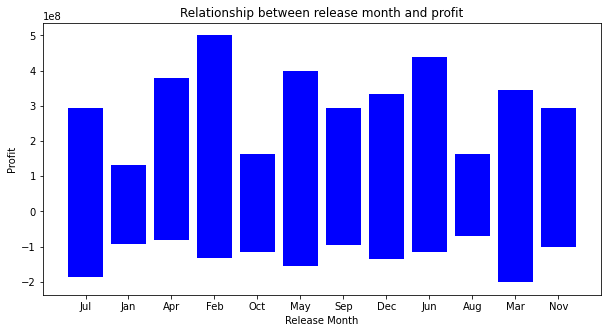

In [29]:
import matplotlib.pyplot as plt
x = profit['release_month']
y = profit['profit']
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, color ='blue')
plt.xlabel("Release Month")
plt.ylabel("Profit")
plt.title("Relationship between release month and profit")
plt.show()



In [30]:
profit['genre1'].value_counts().head(10)

Action         303
Comedy         165
Drama          149
Adventure      108
Biography       91
Horror          53
Crime           43
Documentary     33
Thriller        10
Fantasy          8
Name: genre1, dtype: int64

In [31]:
profit['genre2'].value_counts().head(10)

Drama        221
Adventure    141
Comedy        81
Crime         66
Animation     54
Romance       47
Mystery       45
Thriller      42
Horror        37
Fantasy       28
Name: genre2, dtype: int64

In [32]:
profit['genre3'].value_counts().head(10)

Thriller    116
Drama        91
Sci-Fi       81
Comedy       74
Romance      50
Fantasy      46
Crime        33
Mystery      32
History      25
Horror       21
Name: genre3, dtype: int64

In [33]:
dm = profit['Distributor'].value_counts().head(10)

In [34]:
profit = profit.drop(['unprofitable'], axis = 1)
profit = profit.drop(['profitable'], axis = 1)
profit

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,domestic_profit_margin,worldwide_profit_margin,Distributor,genre1,genre2,genre3,release_month
0,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,99.560718,99.759941,Warner Bros.,Horror,Mystery,Thriller,Jul
1,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,52262945,98.122522,99.017291,Paramount Pictures,Horror,NaN,NaN,Jan
2,14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,96.950257,98.446341,Universal Pictures,Horror,Mystery,Thriller,Apr
3,50,2017-01-20,Split,5000000,138141585,278964806,133141585,96.380525,98.207659,Universal Pictures,Action,Drama,Sport,Jan
10,49,2017-02-24,Get Out,5000000,176040665,255367951,171040665,97.159747,98.042041,Universal Pictures,Horror,Mystery,Thriller,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,43,2019-09-13,The Goldfinch,40000000,0,0,-40000000,-inf,-inf,Warner Bros.,Drama,NaN,NaN,Sep
2066,8,2019-11-22,The Rhythm Section,50000000,0,0,-50000000,-inf,-inf,Paramount Pictures,Action,Mystery,Thriller,Jan
2071,30,2019-09-30,Unhinged,29000000,0,0,-29000000,-inf,-inf,Solstice Studios,Thriller,NaN,NaN,Aug
2077,9,2019-09-20,Ad Astra,49800000,0,0,-49800000,-inf,-inf,Twentieth Century Fox,Adventure,Drama,Mystery,Sep


In [35]:
profit.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit,domestic_profit_margin,worldwide_profit_margin
count,977.000000,9.770000e+02,9.770000e+02,9.770000e+02,9.770000e+02,977.000000,977.000000
mean,51.753327,5.303024e+07,7.043465e+07,1.785892e+08,1.740441e+07,-inf,-inf
std,28.953743,5.890999e+07,9.366244e+07,2.596604e+08,6.797767e+07,NaN,NaN
min,1.000000,1.000000e+05,0.000000e+00,0.000000e+00,-2.019413e+08,-inf,-inf
25%,27.000000,1.200000e+07,1.467767e+07,2.731787e+07,-1.223334e+07,-59.970083,27.547262
50%,52.000000,3.000000e+07,3.851861e+07,7.623500e+07,3.802208e+06,16.186626,63.121072
75%,77.000000,6.500000e+07,8.441038e+07,2.135915e+08,3.407756e+07,59.558307,79.280664
max,100.000000,3.306000e+08,7.000596e+08,2.048134e+09,5.000596e+08,99.560718,99.759941


In [36]:
profit.groupby(["release_month", "genre1"])["movie"].count()

release_month  genre1   
Apr            Action       19
               Adventure     7
               Biography     5
               Comedy       14
               Crime         1
                            ..
Sep            Drama        17
               Horror        4
               Music         1
               Sport         1
               Thriller      1
Name: movie, Length: 118, dtype: int64

In [37]:
profit.groupby("release_month", sort=False)["movie"].count()

release_month
Jul    78
Jan    65
Apr    75
Feb    73
Oct    88
May    70
Sep    84
Dec    93
Jun    84
Aug    78
Mar    94
Nov    95
Name: movie, dtype: int64

In [38]:
pbrm = profit.groupby("release_month", sort=False)["profit"].median()
pbrm

release_month
Jul    15301934.5
Jan     5703475.0
Apr     3446117.0
Feb     8080225.0
Oct     1102757.0
May     3752190.5
Sep     1347153.0
Dec     4482031.0
Jun     2983214.0
Aug      806726.5
Mar    -1963526.5
Nov    14445357.0
Name: profit, dtype: float64

In [39]:
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pbrm = pbrm.reindex(new_order, axis=0)
pbrm

release_month
Jan     5703475.0
Feb     8080225.0
Mar    -1963526.5
Apr     3446117.0
May     3752190.5
Jun     2983214.0
Jul    15301934.5
Aug      806726.5
Sep     1347153.0
Oct     1102757.0
Nov    14445357.0
Dec     4482031.0
Name: profit, dtype: float64

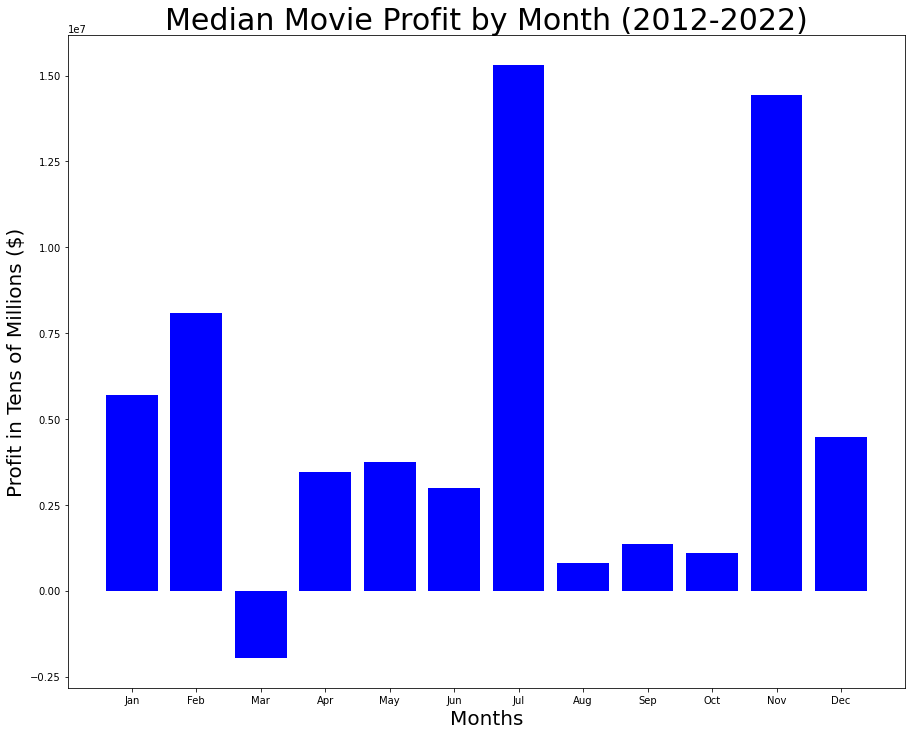

In [40]:
x = list(pbrm.keys())
y = list(pbrm)
fig = plt.figure(figsize = (15, 12))
plt.bar(x, y, color ='blue')
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Profit in Tens of Millions ($)', fontsize = 20)
plt.title('Median Movie Profit by Month (2012-2022)', fontsize = 30)
plt.show()

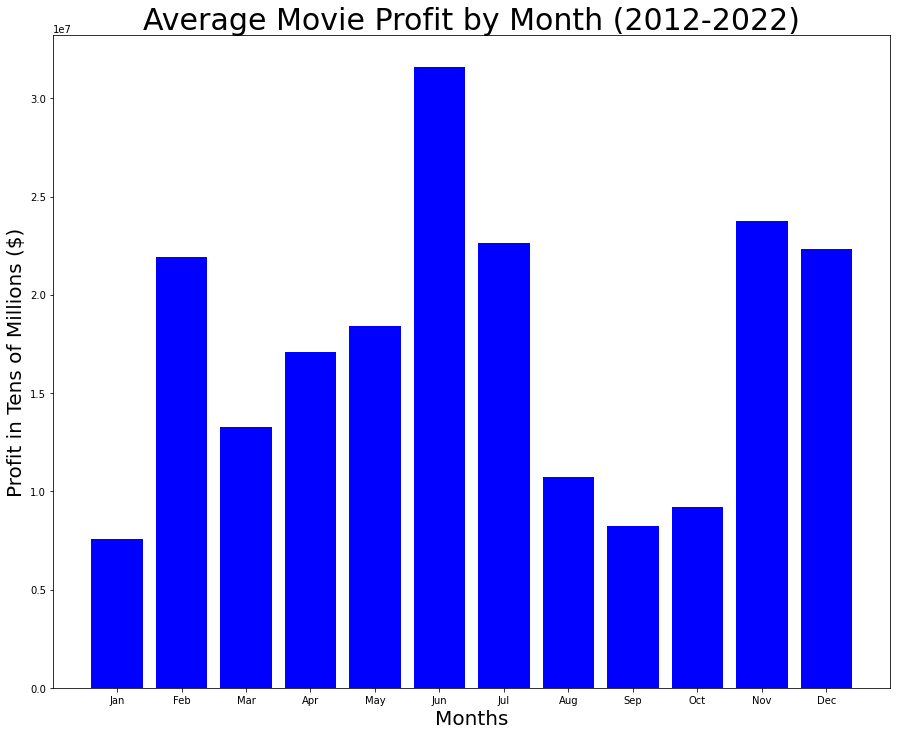

In [41]:
apbrm = profit.groupby("release_month", sort=False)["profit"].mean()
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
apbrm = apbrm.reindex(new_order, axis=0)
x = list(apbrm.keys())
y = list(apbrm)
fig = plt.figure(figsize = (15, 12))
plt.bar(x, y, color ='blue')
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Profit in Tens of Millions ($)', fontsize = 20)
plt.title('Average Movie Profit by Month (2012-2022)', fontsize = 30)
plt.show()

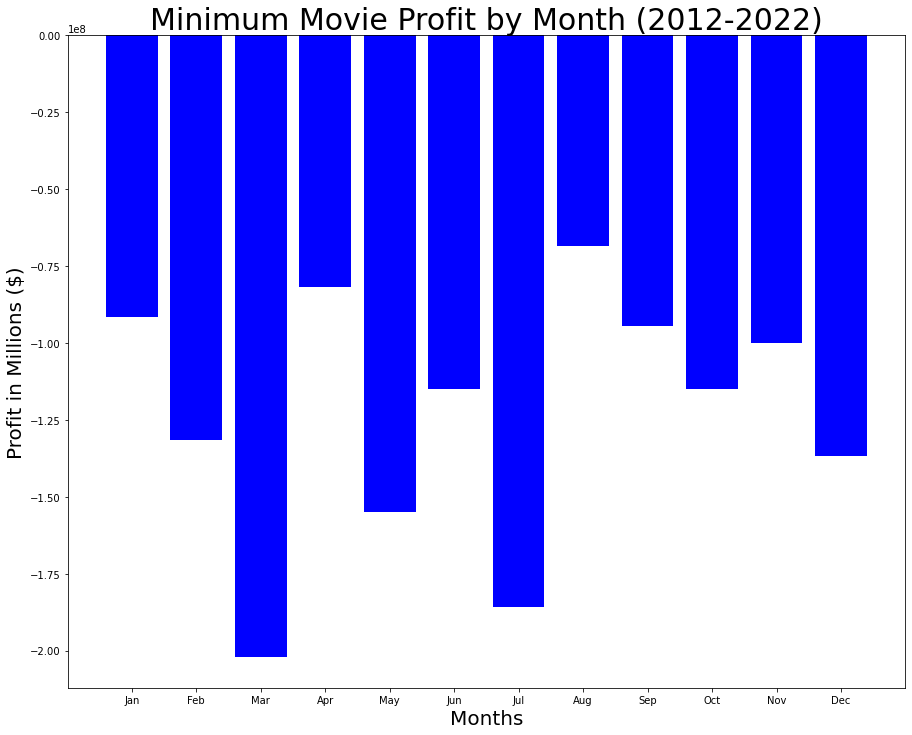

In [42]:
minpbrm = profit.groupby("release_month", sort=False)["profit"].min()
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
minpbrm = minpbrm.reindex(new_order, axis=0)
x = list(minpbrm.keys())
y = list(minpbrm)
fig = plt.figure(figsize = (15, 12))
plt.bar(x, y, color ='blue')
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Profit in Millions ($)', fontsize = 20)
plt.title('Minimum Movie Profit by Month (2012-2022)', fontsize = 30)
plt.show()

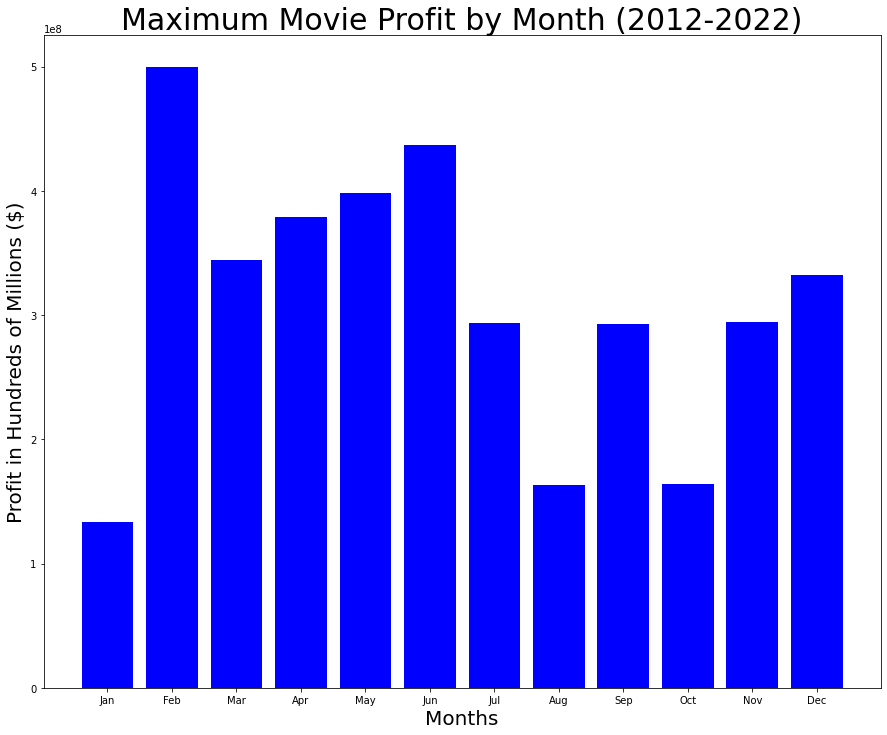

In [43]:
maxpbrm = profit.groupby("release_month", sort=False)["profit"].max()
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
maxpbrm = maxpbrm.reindex(new_order, axis=0)
x = list(maxpbrm.keys())
y = list(maxpbrm)
fig = plt.figure(figsize = (15, 12))
plt.bar(x, y, color ='blue')
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Profit in Hundreds of Millions ($)', fontsize = 20)
plt.title('Maximum Movie Profit by Month (2012-2022)', fontsize = 30)
plt.show()

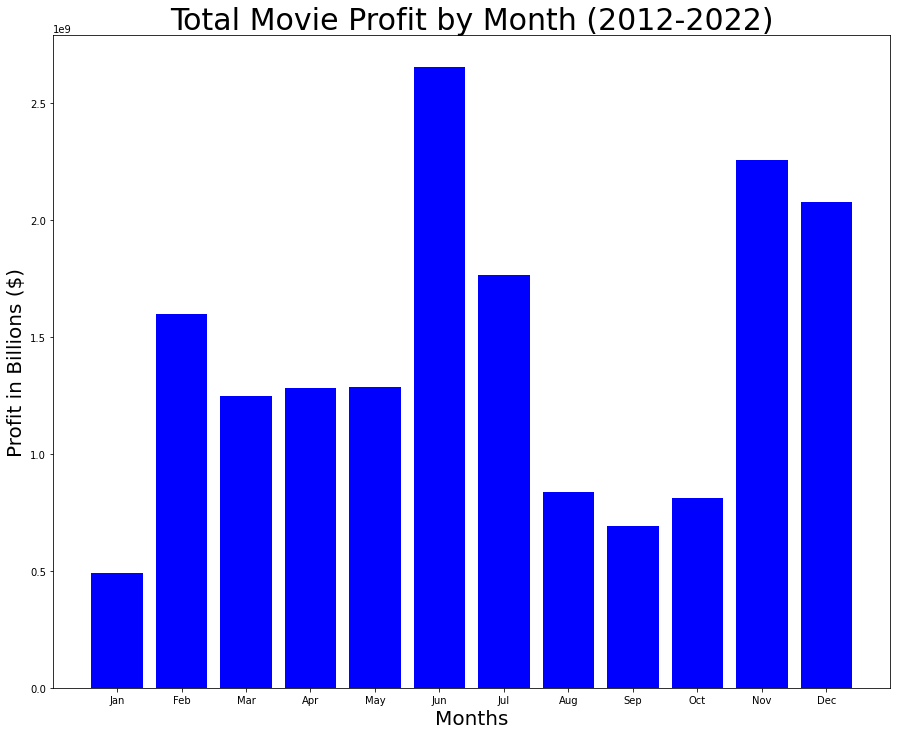

In [44]:
tpbrm = profit.groupby("release_month", sort=False)["profit"].sum()
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
tpbrm = tpbrm.reindex(new_order, axis=0)
x = list(tpbrm.keys())
y = list(tpbrm)
fig = plt.figure(figsize = (15, 12))
plt.bar(x, y, color ='blue')
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Profit in Billions ($)', fontsize = 20)
plt.title('Total Movie Profit by Month (2012-2022)', fontsize = 30)
plt.show()

In [45]:
dpm = profit.groupby("release_month", sort=False)["domestic_profit_margin"].sum()

In [46]:
dpm

release_month
Jul           -inf
Jan           -inf
Apr           -inf
Feb   -3144.560564
Oct   -3953.886455
May           -inf
Sep           -inf
Dec   -4989.574828
Jun           -inf
Aug           -inf
Mar   -4406.887846
Nov           -inf
Name: domestic_profit_margin, dtype: float64

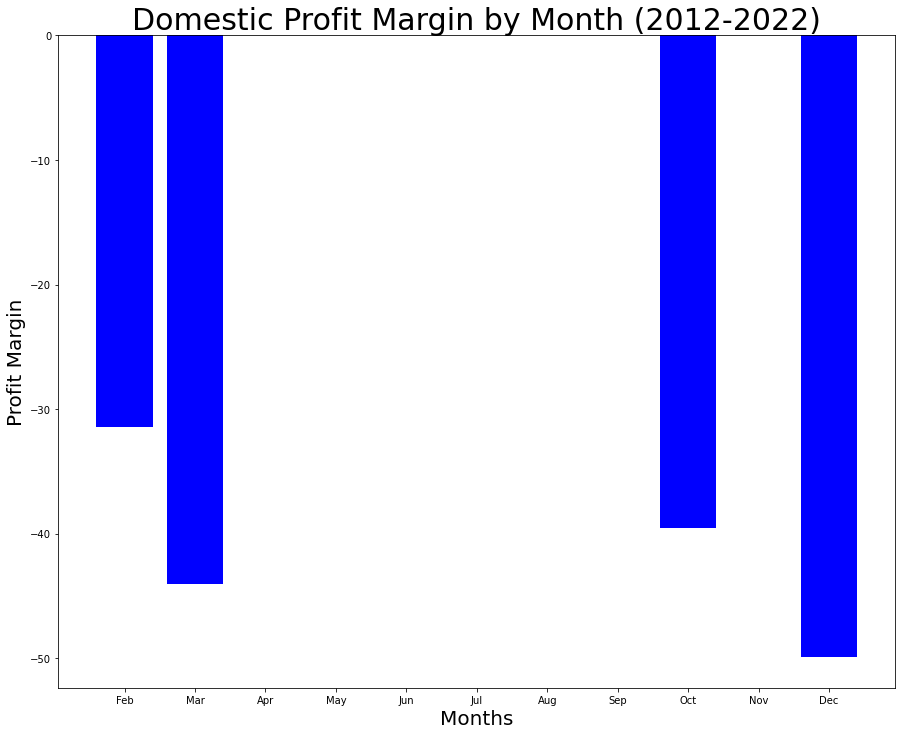

In [47]:
dpm = profit.groupby("release_month", sort=False)["domestic_profit_margin"].sum()
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dpm = dpm.reindex(new_order, axis=0)
x = list(dpm.keys())
y = list((dpm/100))
fig = plt.figure(figsize = (15, 12))
plt.bar(x, y, color ='blue')
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Profit Margin', fontsize = 20)
plt.title('Domestic Profit Margin by Month (2012-2022)', fontsize = 30)
plt.show()

In [48]:
profit.isna().sum()

id                           0
release_date                 0
movie                        0
production_budget            0
domestic_gross               0
worldwide_gross              0
profit                       0
domestic_profit_margin       0
worldwide_profit_margin      0
Distributor                  6
genre1                       0
genre2                     115
genre3                     333
release_month                0
dtype: int64

In [49]:
dm = profit['Distributor'].value_counts().head(10)
dm

Warner Bros.                           125
Universal Pictures                     108
Twentieth Century Fox                   95
Lionsgate                               82
Paramount Pictures                      70
Sony Pictures Entertainment (SPE)       67
Walt Disney Studios Motion Pictures     65
Focus Features                          33
Open Road Films (II)                    30
The Weinstein Company                   29
Name: Distributor, dtype: int64

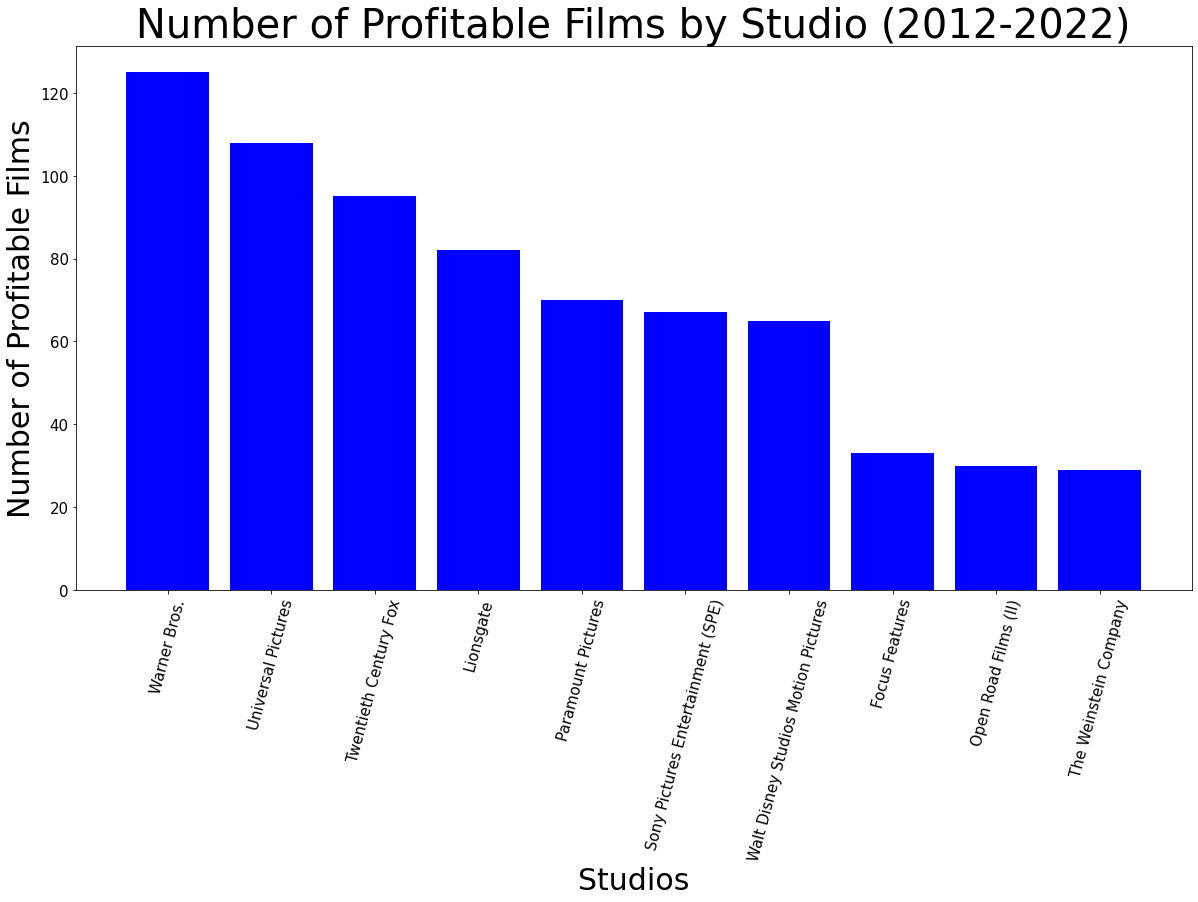

In [50]:
x = list(dm.keys())
y = list(dm)
fig = plt.figure(figsize = (20, 10))
plt.bar(x, y, color ='blue')
plt.xlabel('Studios', fontsize = 30)
plt.ylabel('Number of Profitable Films', fontsize = 30)
plt.xticks(fontsize =15, rotation = 75)
plt.yticks(fontsize =15)
plt.title('Number of Profitable Films by Studio (2012-2022)', fontsize = 40)
plt.show()


In [51]:
gpbrm = profit.groupby(["release_month","genre1"])["profit"].sum()
gpbrm = gpbrm.groupby("genre1").sum().sort_values(ascending=False)
gpbrm

genre1
Action         4436846726
Comedy         3177644424
Drama          2125847125
Horror         2094942501
Adventure      2042825092
Biography      1567226218
Documentary     527326549
Crime           425640107
Fantasy         389984640
Animation       301130100
Musical         106151353
Romance          10451777
Family            3204489
Sport           -13689446
Music           -14580033
Sci-Fi          -19041685
Thriller       -157799232
Name: profit, dtype: int64

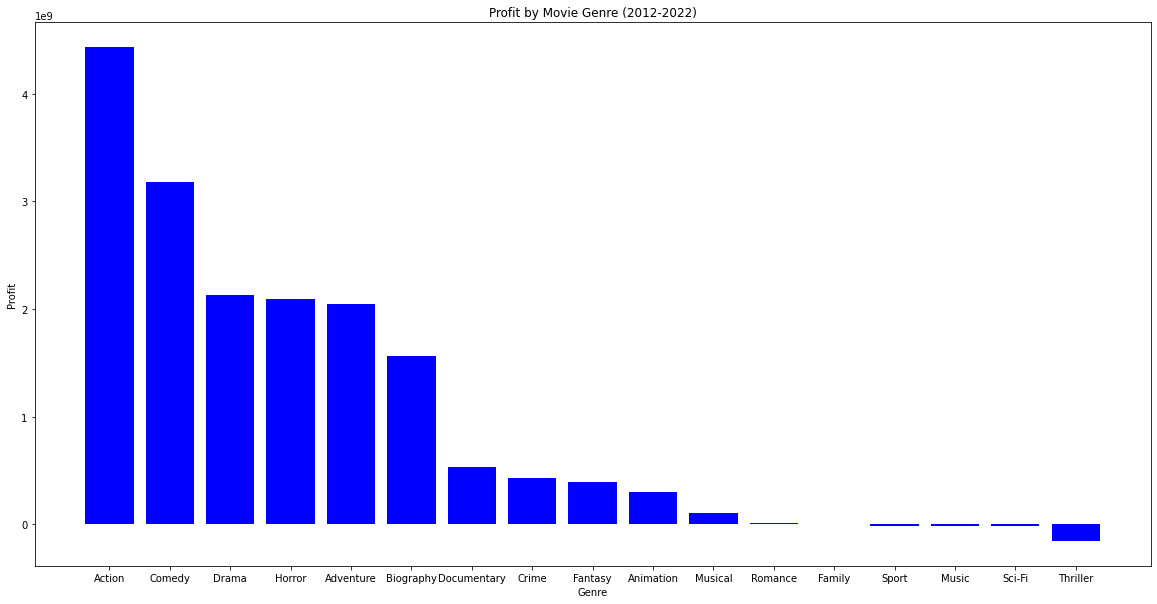

In [52]:
x = list(gpbrm.keys())
y = list(gpbrm)
fig = plt.figure(figsize = (20, 10))
plt.bar(x, y, color ='blue')
plt.xlabel('Genre')
plt.ylabel('Profit')
plt.title('Profit by Movie Genre (2012-2022)')
plt.show()

In [53]:
fims.loc[films['production_budget'] <= 5000000, 'budget_tier'] = 'low_tier'
fims.loc[films['production_budget'] >= 50000000, 'budget_tier'] = 'high_tier'

In [54]:
films['budget_tier'] = films['budget_tier'].fillna('mid_tier')
profit

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,domestic_profit_margin,worldwide_profit_margin,Distributor,genre1,genre2,genre3,release_month,budget_tier
0,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,99.560718,99.759941,Warner Bros.,Horror,Mystery,Thriller,Jul,low_tier
1,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,52262945,98.122522,99.017291,Paramount Pictures,Horror,NaN,NaN,Jan,low_tier
2,14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,96.950257,98.446341,Universal Pictures,Horror,Mystery,Thriller,Apr,low_tier
3,50,2017-01-20,Split,5000000,138141585,278964806,133141585,96.380525,98.207659,Universal Pictures,Action,Drama,Sport,Jan,low_tier
10,49,2017-02-24,Get Out,5000000,176040665,255367951,171040665,97.159747,98.042041,Universal Pictures,Horror,Mystery,Thriller,Feb,low_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,43,2019-09-13,The Goldfinch,40000000,0,0,-40000000,-inf,-inf,Warner Bros.,Drama,NaN,NaN,Sep,mid_tier
2066,8,2019-11-22,The Rhythm Section,50000000,0,0,-50000000,-inf,-inf,Paramount Pictures,Action,Mystery,Thriller,Jan,high_tier
2071,30,2019-09-30,Unhinged,29000000,0,0,-29000000,-inf,-inf,Solstice Studios,Thriller,NaN,NaN,Aug,mid_tier
2077,9,2019-09-20,Ad Astra,49800000,0,0,-49800000,-inf,-inf,Twentieth Century Fox,Adventure,Drama,Mystery,Sep,mid_tier


In [55]:
profit.isna().sum()

id                           0
release_date                 0
movie                        0
production_budget            0
domestic_gross               0
worldwide_gross              0
profit                       0
domestic_profit_margin       0
worldwide_profit_margin      0
Distributor                  6
genre1                       0
genre2                     115
genre3                     333
release_month                0
budget_tier                  0
dtype: int64

In [56]:
asd = profit[profit['budget_tier'] == 'low_tier'].sort_values(by='domestic_profit_margin', ascending = False)
asd

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,domestic_profit_margin,worldwide_profit_margin,Distributor,genre1,genre2,genre3,release_month,budget_tier
0,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,99.560718,99.759941,Warner Bros.,Horror,Mystery,Thriller,Jul,low_tier
1,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,52262945,98.122522,99.017291,Paramount Pictures,Horror,NaN,NaN,Jan,low_tier
10,49,2017-02-24,Get Out,5000000,176040665,255367951,171040665,97.159747,98.042041,Universal Pictures,Horror,Mystery,Thriller,Feb,low_tier
2,14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,96.950257,98.446341,Universal Pictures,Horror,Mystery,Thriller,Apr,low_tier
3,50,2017-01-20,Split,5000000,138141585,278964806,133141585,96.380525,98.207659,Universal Pictures,Action,Drama,Sport,Jan,low_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,35,2019-06-07,Late Night,4000000,246305,246305,-3753695,-1524.002761,-1524.002761,Amazon Studios,Comedy,Drama,NaN,Jun,low_tier
1601,64,2014-06-06,Anna,4357373,0,1200000,-4357373,-inf,-263.114417,Lionsgate,Action,Thriller,NaN,Jun,low_tier
1985,2,2012-12-31,After,650000,0,0,-650000,-inf,-inf,Aviron Pictures,Adventure,NaN,NaN,Apr,low_tier
2001,23,2016-03-01,1982,1000000,0,0,-1000000,-inf,-inf,Tricycle Logic,Documentary,NaN,NaN,Jun,low_tier


In [57]:
fgh = profit[profit['budget_tier'] == 'mid_tier'].sort_values(by='domestic_profit_margin', ascending = False)
fgh

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,domestic_profit_margin,worldwide_profit_margin,Distributor,genre1,genre2,genre3,release_month,budget_tier
41,88,2012-06-29,Magic Mike,7000000,113721571,170549753,106721571,93.844615,95.895626,Warner Bros.,Comedy,Drama,NaN,Jun,mid_tier
38,36,2018-10-19,Halloween,10000000,159342015,254900667,149342015,93.724191,96.076903,Universal Pictures,Horror,Thriller,NaN,Oct,mid_tier
15,84,2014-10-03,Annabelle,6500000,84273813,256862920,77773813,92.287047,97.469467,Warner Bros.,Horror,Mystery,Thriller,Oct,mid_tier
101,90,2018-03-16,I Can Only Imagine,7000000,83482352,85604221,76482352,91.614994,91.822833,Roadside Attractions,Biography,Drama,Family,Mar,mid_tier
53,66,2018-04-06,A Quiet Place,17000000,188024361,334522294,171024361,90.958618,94.918126,Paramount Pictures,Documentary,NaN,NaN,Apr,mid_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,16,2019-07-12,Crawl,17000000,0,0,-17000000,-inf,-inf,Paramount Pictures,Drama,NaN,NaN,Jul,mid_tier
2025,64,2019-08-14,Blinded by the Light,15000000,0,0,-15000000,-inf,-inf,Warner Bros.,Biography,Comedy,Drama,Aug,mid_tier
2056,43,2019-09-13,The Goldfinch,40000000,0,0,-40000000,-inf,-inf,Warner Bros.,Drama,NaN,NaN,Sep,mid_tier
2071,30,2019-09-30,Unhinged,29000000,0,0,-29000000,-inf,-inf,Solstice Studios,Thriller,NaN,NaN,Aug,mid_tier


In [58]:
jkl = profit[profit['budget_tier'] == 'high_tier'].sort_values(by='domestic_profit_margin', ascending = False)
jkl

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,domestic_profit_margin,worldwide_profit_margin,Distributor,genre1,genre2,genre3,release_month,budget_tier
78,56,2016-02-12,Deadpool,58000000,363070709,801025593,305070709,84.025150,92.759283,Twentieth Century Fox,Action,Adventure,Comedy,Feb,high_tier
154,57,2014-12-25,American Sniper,58000000,350126372,547326372,292126372,83.434553,89.403032,Warner Bros.,Action,Biography,Drama,Dec,high_tier
184,38,2012-03-23,The Hunger Games,80000000,408010692,677923379,328010692,80.392671,88.199256,Lionsgate,Action,Adventure,Sci-Fi,Mar,high_tier
107,26,2016-07-08,The Secret Life of Pets,75000000,368384330,886750534,293384330,79.640828,91.542153,Universal Pictures,Adventure,Animation,Comedy,Jul,high_tier
87,22,2013-07-03,Despicable Me 2,76000000,368065385,975216835,292065385,79.351495,92.206861,Universal Pictures,Adventure,Animation,Comedy,Jul,high_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,47,2015-01-16,Blackhat,70000000,8005980,19665004,-61994020,-774.346426,-255.962297,Universal Pictures,Action,Crime,Thriller,Jan,high_tier
1672,78,2017-04-21,The Promise,90000000,8224288,10551417,-81775712,-994.319654,-752.966004,Open Road Films (II),Thriller,NaN,NaN,Apr,high_tier
1743,42,2019-06-14,Men in Black International,110000000,3100000,3100000,-106900000,-3448.387097,-3448.387097,Sony Pictures Entertainment (SPE),Action,Adventure,Comedy,Jun,high_tier
1926,53,2019-11-08,Midway,59500000,0,0,-59500000,-inf,-inf,Lionsgate,Documentary,Family,NaN,Nov,high_tier


In [59]:
profit.to_csv('profit.csv', index=False)

In [60]:
profit

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,domestic_profit_margin,worldwide_profit_margin,Distributor,genre1,genre2,genre3,release_month,budget_tier
0,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,99.560718,99.759941,Warner Bros.,Horror,Mystery,Thriller,Jul,low_tier
1,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,52262945,98.122522,99.017291,Paramount Pictures,Horror,NaN,NaN,Jan,low_tier
2,14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,96.950257,98.446341,Universal Pictures,Horror,Mystery,Thriller,Apr,low_tier
3,50,2017-01-20,Split,5000000,138141585,278964806,133141585,96.380525,98.207659,Universal Pictures,Action,Drama,Sport,Jan,low_tier
10,49,2017-02-24,Get Out,5000000,176040665,255367951,171040665,97.159747,98.042041,Universal Pictures,Horror,Mystery,Thriller,Feb,low_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,43,2019-09-13,The Goldfinch,40000000,0,0,-40000000,-inf,-inf,Warner Bros.,Drama,NaN,NaN,Sep,mid_tier
2066,8,2019-11-22,The Rhythm Section,50000000,0,0,-50000000,-inf,-inf,Paramount Pictures,Action,Mystery,Thriller,Jan,high_tier
2071,30,2019-09-30,Unhinged,29000000,0,0,-29000000,-inf,-inf,Solstice Studios,Thriller,NaN,NaN,Aug,mid_tier
2077,9,2019-09-20,Ad Astra,49800000,0,0,-49800000,-inf,-inf,Twentieth Century Fox,Adventure,Drama,Mystery,Sep,mid_tier


In [75]:
100 * jkl["Distributor"].value_counts(normalize=True)

Warner Bros.                           19.230769
Twentieth Century Fox                  16.568047
Walt Disney Studios Motion Pictures    15.384615
Sony Pictures Entertainment (SPE)      12.426036
Universal Pictures                     11.834320
Paramount Pictures                      9.763314
Lionsgate                               7.692308
Focus Features                          1.183432
Open Road Films (II)                    0.887574
DreamWorks                              0.591716
Relativity Media                        0.591716
TriStar Pictures                        0.591716
FilmDistrict                            0.591716
Screen Gems                             0.591716
STX Entertainment                       0.591716
The Weinstein Company                   0.591716
Studio 8                                0.295858
Annapurna Pictures                      0.295858
Metro-Goldwyn-Mayer (MGM)               0.295858
Name: Distributor, dtype: float64

In [76]:
100 * fgh["Distributor"].value_counts(normalize=True)

Universal Pictures                       11.046512
Warner Bros.                             10.852713
Lionsgate                                 9.108527
Twentieth Century Fox                     7.364341
Paramount Pictures                        6.201550
Sony Pictures Entertainment (SPE)         4.844961
Focus Features                            4.844961
The Weinstein Company                     4.844961
Fox Searchlight Pictures                  4.457364
Open Road Films (II)                      4.263566
Relativity Media                          3.488372
Screen Gems                               3.488372
STX Entertainment                         3.488372
Walt Disney Studios Motion Pictures       2.519380
TriStar Pictures                          2.131783
A24                                       1.937984
Roadside Attractions                      1.356589
Sony Pictures Classics                    1.162791
Bleecker Street Media                     0.968992
CBS Films                      

In [77]:
100 * asd["Distributor"].value_counts(normalize=True)

A24                                      11.111111
Universal Pictures                        9.401709
Lionsgate                                 7.692308
BH Tilt                                   7.692308
Roadside Attractions                      5.128205
Sony Pictures Classics                    4.273504
Open Road Films (II)                      4.273504
Paramount Pictures                        4.273504
Warner Bros.                              3.418803
Fox Searchlight Pictures                  3.418803
Focus Features                            3.418803
The Samuel Goldwyn Company                2.564103
IFC Films                                 2.564103
Pure Flix Entertainment                   1.709402
Relativity Media                          1.709402
The Weinstein Company                     1.709402
FilmDistrict                              1.709402
Aviron Pictures                           1.709402
Affirm Films                              1.709402
CBS Films                      

In [78]:
100 * profit["budget_tier"].value_counts(normalize=True)

mid_tier     53.121801
high_tier    34.800409
low_tier     12.077789
Name: budget_tier, dtype: float64

In [79]:
low = asd
mid = fgh
high = jkl

In [82]:
low = low.loc[low['profit'] > 0]
low

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,domestic_profit_margin,worldwide_profit_margin,Distributor,genre1,genre2,genre3,release_month,budget_tier
0,80,2015-07-10,The Gallows,100000,22764410,41656474,22664410,99.560718,99.759941,Warner Bros.,Horror,Mystery,Thriller,Jul,low_tier
1,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,52262945,98.122522,99.017291,Paramount Pictures,Horror,NaN,NaN,Jan,low_tier
10,49,2017-02-24,Get Out,5000000,176040665,255367951,171040665,97.159747,98.042041,Universal Pictures,Horror,Mystery,Thriller,Feb,low_tier
2,14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,96.950257,98.446341,Universal Pictures,Horror,Mystery,Thriller,Apr,low_tier
3,50,2017-01-20,Split,5000000,138141585,278964806,133141585,96.380525,98.207659,Universal Pictures,Action,Drama,Sport,Jan,low_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,23,2015-09-18,Captive,2000000,2583301,2791973,583301,22.579676,28.366069,Paramount Pictures,Drama,Thriller,NaN,Sep,low_tier
1223,29,2018-09-21,Fahrenheit 119,5000000,6352306,6653715,1352306,21.288427,24.854010,Briarcliff Entertainment,Documentary,NaN,NaN,Sep,low_tier
1262,25,2018-06-08,Hearts Beat Loud,2000000,2386254,2420962,386254,16.186626,17.388212,Gunpowder & Sky,Comedy,Drama,Music,Jun,low_tier
1279,26,2017-01-20,The Resurrection of Gavin Stone,2000000,2303792,2303792,303792,13.186607,13.186607,BH Tilt,Comedy,Drama,Family,Jan,low_tier


In [86]:
mid = mid.loc[mid['profit'] > 0]
mid

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,domestic_profit_margin,worldwide_profit_margin,Distributor,genre1,genre2,genre3,release_month,budget_tier
41,88,2012-06-29,Magic Mike,7000000,113721571,170549753,106721571,93.844615,95.895626,Warner Bros.,Comedy,Drama,NaN,Jun,mid_tier
38,36,2018-10-19,Halloween,10000000,159342015,254900667,149342015,93.724191,96.076903,Universal Pictures,Horror,Thriller,NaN,Oct,mid_tier
15,84,2014-10-03,Annabelle,6500000,84273813,256862920,77773813,92.287047,97.469467,Warner Bros.,Horror,Mystery,Thriller,Oct,mid_tier
101,90,2018-03-16,I Can Only Imagine,7000000,83482352,85604221,76482352,91.614994,91.822833,Roadside Attractions,Biography,Drama,Family,Mar,mid_tier
53,66,2018-04-06,A Quiet Place,17000000,188024361,334522294,171024361,90.958618,94.918126,Paramount Pictures,Documentary,NaN,NaN,Apr,mid_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,65,2013-08-16,KickAss 2,28000000,28795985,63129909,795985,2.764222,55.647014,Universal Pictures,Action,Comedy,Crime,Aug,mid_tier
1322,34,2019-04-05,The Best of Enemies,10000000,10205616,10205616,205616,2.014734,2.014734,STX Entertainment,Biography,Drama,History,Apr,mid_tier
716,34,2014-07-02,Deliver Us from Evil,30000000,30577122,87956618,577122,1.887431,65.892277,Screen Gems,Horror,Mystery,Thriller,Jul,mid_tier
1297,35,2014-08-01,Get on Up,30000000,30569935,33339868,569935,1.864364,10.017640,Universal Pictures,Biography,Drama,Music,Aug,mid_tier


In [87]:
high = high.loc[high['profit'] > 0]

In [88]:
print(low.shape)
print(mid.shape)
print(high.shape)

(96, 15)
(303, 15)
(160, 15)
